# 各流域工业用水

In [1]:
#!/usr/bin/env python 3.83
# -*-coding:utf-8 -*-
# Created date: 2021-21-27
# @Author  : Shuang Song
# @Contact   : SongshGeo@gmail.com
# GitHub   : https://github.com/SongshGeo
# Research Gate: https://www.researchgate.net/profile/Song_Shuang9

# 常用的软件包
import sys, os  # 系统路径工具
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# 添加上级目录
sys.path.append('..')

# 显示绘图
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.facecolor'] = 'white'

# 自定义配色
nature_colors = {
    'NS': "#c83c1c",
    'Nature': "#29303c",
    'NCC': "#0889a6",
    'NC': "#f1801f",
    'NG': "#006c43",
    'NHB': "#1951A0",
    'NEE': "#C7D530"
}

已经计算了各流域的地表水使用压力情况，存在四种不同的类型：

- 压力增加，压力水平大的流域：黄河
- 压力增加，但远没有达到地表水资源压力的流域：长江、珠江
- 压力不变，压力水平大：淮河
- 压力不变，压力水平极限：海河

接下来尝试通过

In [2]:
data = pd.read_csv("../data/large/pnas_identified.csv", index_col=0)
data.head()

,City_ID,Year,IRR,Irrigated area: Total,Irrigated area: Rice,Irrigated area: Wheat,Irrigated area: Maize,Irrigated area: Vegetables and fruits,Irrigated area: Others,Irrigation water-use intensity (WUI): Total,...,Shaoefile_,Perfecture,Province_n,MBASIN_ID,MNAME,CATCHMNT,MNAME_CH,LABEL_CH,Shape_Length,Shape_Area
0,C1,1965,1.229927,127.315625,59.834838,8.289719,0.443002,2.697220,56.050846,966.045314,...,8,C1,Anhui,12,Huai River,Pacific,淮河流域,淮河,1.149281,0.047989
1,C1,1965,1.229927,127.315625,59.834838,8.289719,0.443002,2.697220,56.050846,966.045314,...,8,C1,Anhui,13,Yangtze River,Pacific,长江流域,长江,7.508193,1.398109
2,C1,1966,1.274452,129.968097,62.355186,7.819602,0.404165,2.741800,56.647345,980.588287,...,8,C1,Anhui,12,Huai River,Pacific,淮河流域,淮河,1.149281,0.047989
3,C1,1966,1.274452,129.968097,62.355186,7.819602,0.404165,2.741800,56.647345,980.588287,...,8,C1,Anhui,13,Yangtze River,Pacific,长江流域,长江,7.508193,1.398109
4,C1,1967,1.482867,152.163380,68.736923,9.776923,0.489071,3.267321,69.893142,974.522696,...,8,C1,Anhui,12,Huai River,Pacific,淮河流域,淮河,1.149281,0.047989


<AxesSubplot:xlabel='Year'>

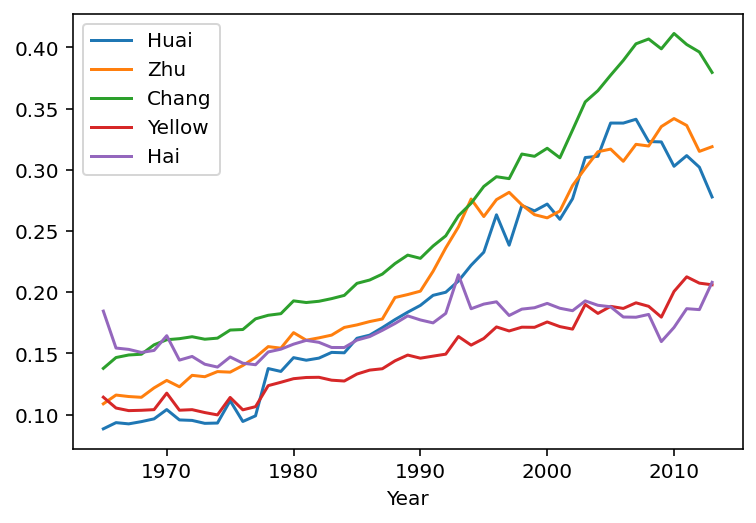

In [15]:
ENG_NAME = {
    '淮河流域': 'Huai', 
    '珠江流域': 'Zhu', 
    '长江流域': 'Chang', 
    '黄河流域': 'Yellow', 
    '海河流域': 'Hai', 
}

result = pd.DataFrame()
for basin in ENG_NAME:
    basin_eng = ENG_NAME[basin]
    tmp_data = data[data['MNAME_CH'] == basin][['Year', 'IRR', 'IND']]
    ind_ratio = tmp_data.groupby('Year').sum().apply(lambda row: row['IND']/row.sum(), axis=1)
    result[basin_eng] = ind_ratio
    
result.plot()